<a href="https://colab.research.google.com/github/fabien0008/ScroogeTrainer/blob/master/ScroogeTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.3.0


### Getting data from Google drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!mkdir /content/scrooge_dataset

In [ ]:
!tar xjf "/content/drive/My Drive/Colab Notebooks/dataset.tar.bz2" --directory=/content/scrooge_dataset/

In [ ]:
!du --max-depth=1 -h /content/scrooge_dataset/dataset

952M	/content/scrooge_dataset/dataset/rosa
1.3G	/content/scrooge_dataset/dataset/barks
2.2G	/content/scrooge_dataset/dataset


## Exploring prepared dataset

```
# This is formatted as code
```



In [ ]:
import pathlib
data_dir = pathlib.Path('/content/scrooge_dataset/dataset')

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2692


### Maitre Carl Barks

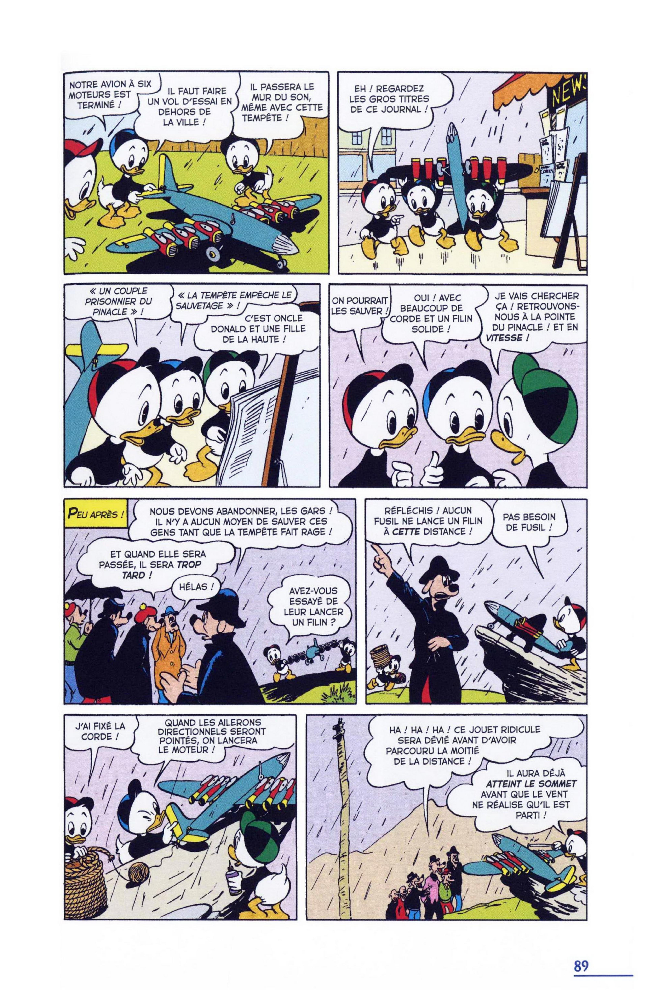

In [ ]:
barks_pages = list(data_dir.glob('barks/*.png'))
PIL.Image.open(str(barks_pages[0]))

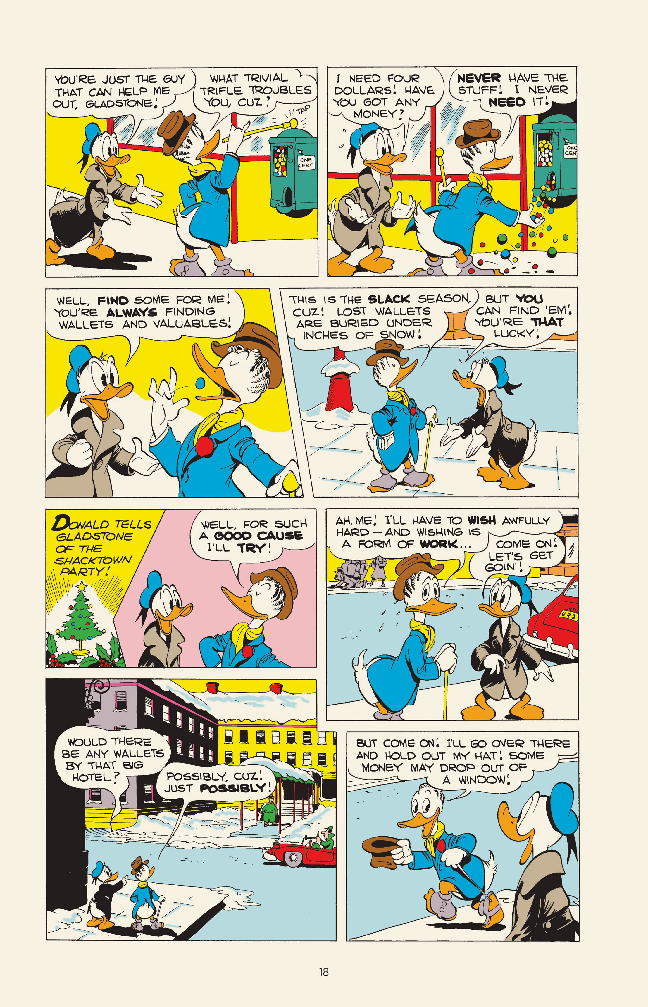

In [ ]:
PIL.Image.open(str(barks_pages[1]))

### Maitre Don Rosa

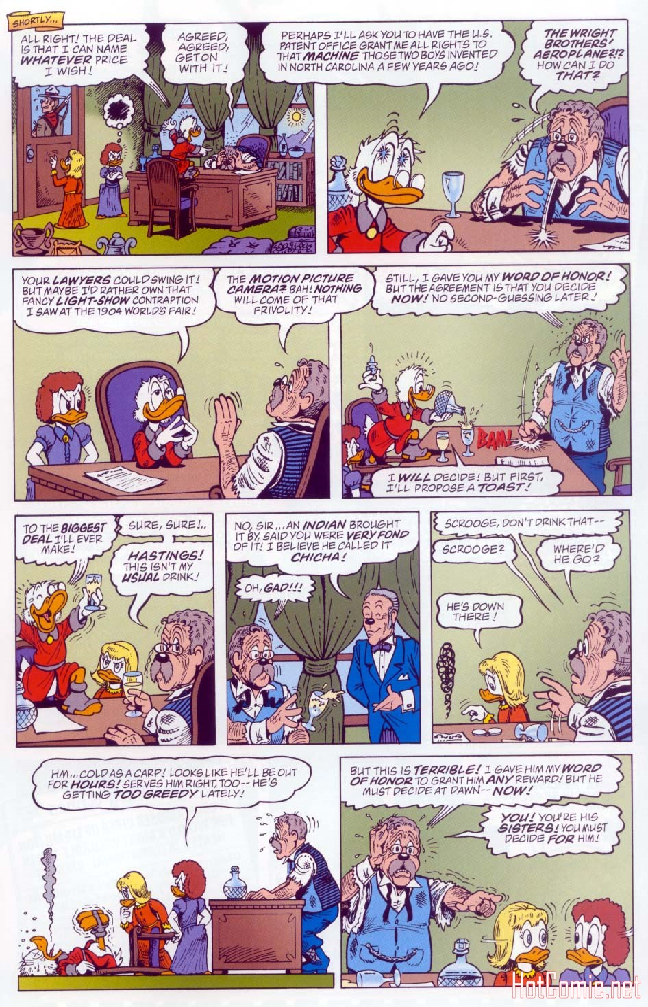

In [ ]:
rosa_pages = list(data_dir.glob('rosa/*.png'))
PIL.Image.open(str(rosa_pages[0]))

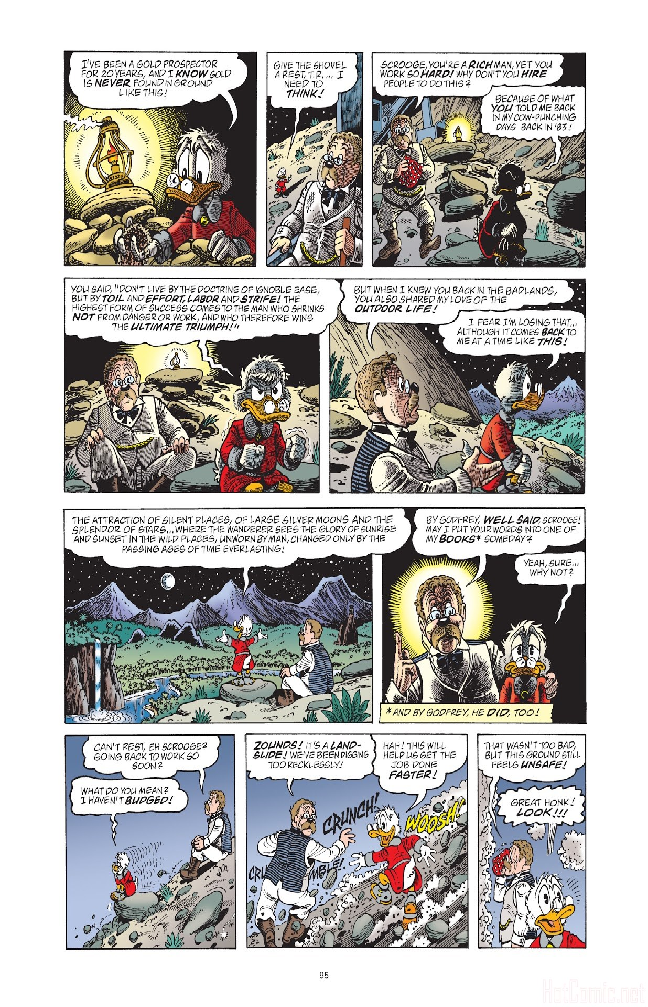

In [ ]:
PIL.Image.open(str(rosa_pages[1]))

## Convert raw images to keras dataset

In [ ]:
batch_size = 16
img_height = 1007
img_width = 648

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 2692 files belonging to 2 classes.
Using 2154 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
   shuffle=True)

Found 2692 files belonging to 2 classes.
Using 538 files for validation.


# Prepare Training

In [ ]:
class_names = train_ds.class_names
print(class_names)

['barks', 'rosa']


In [ ]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 1007, 648, 3)
(16,)


In [ ]:
from tensorflow.keras import layers

#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
## Notice the pixels values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image)) 

In [ ]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(200, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  #loss='categorical_crossentropy',
  metrics=['accuracy'])

# Train!

In [ ]:
epochs=10

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
135/135 [==============================] - 118s 870ms/step - loss: 1.4868e-05 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9870
Epoch 2/10
135/135 [==============================] - 117s 868ms/step - loss: 1.1390e-05 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9870
Epoch 3/10
135/135 [==============================] - 117s 867ms/step - loss: 9.2241e-06 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9870
Epoch 4/10
135/135 [==============================] - 117s 869ms/step - loss: 7.6399e-06 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9870
Epoch 5/10
135/135 [==============================] - 117s 869ms/step - loss: 6.4176e-06 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9888
Epoch 6/10
135/135 [==============================] - 117s 867ms/step - loss: 5.4759e-06 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9888
Epoch 7/10
135/135 [==============================] - 117s 866ms/step - loss: 4.7427e-06 - accuracy:

# Explore training results

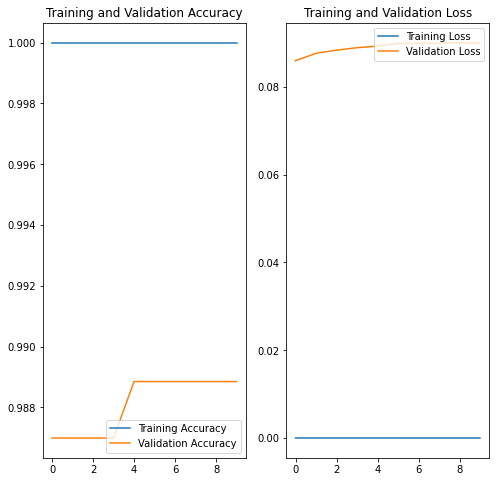

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Compile model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 1007, 648, 3)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1005, 646, 32)     896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 502, 323, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 500, 321, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 250, 160, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 248, 158, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 124, 79, 32)      

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
135/135 [==============================] - 118s 870ms/step - loss: 0.0445 - accuracy: 0.9949 - val_loss: 0.2549 - val_accuracy: 0.9777
Epoch 2/15
135/135 [==============================] - 117s 869ms/step - loss: 7.3223e-05 - accuracy: 1.0000 - val_loss: 0.3432 - val_accuracy: 0.9814
Epoch 3/15
135/135 [==============================] - 117s 867ms/step - loss: 3.8405e-05 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9796
Epoch 4/15
135/135 [==============================] - 117s 868ms/step - loss: 9.0728e-06 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9851
Epoch 5/15
135/135 [==============================] - 117s 868ms/step - loss: 2.7601e-06 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9833
Epoch 6/15
135/135 [==============================] - 117s 868ms/step - loss: 1.3403e-06 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9851
Epoch 7/15
135/135 [==============================] - 117s 868ms/step - loss: 8.1362e-07 - accuracy: 1.0

# Visualize results

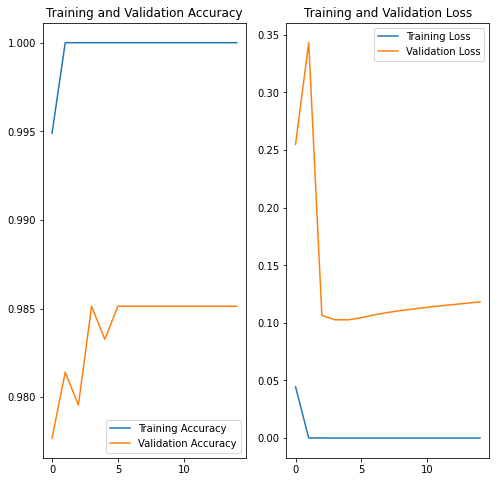

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict

In [ ]:
#barks_snap_url = "/content/drive/My Drive/Colab Notebooks/screenshot_barks.png"
#barks_snap_path = tf.keras.utils.get_file('barks_snap', origin=barks_snap_url)
from keras.preprocessing.image import load_img
#barks_snap_path = tf.keras.utils.get_file('barks_snap', origin="/content/drive/My Drive/Colab Notebooks/screenshot_barks.png")
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/screenshot_barks.png')
#img = tf.keras.preprocessing.image.load_img('/content/scrooge_dataset/dataset/rosa/EN0195c6.png')
#img = tf.keras.preprocessing.image.load_img('/content/scrooge_dataset/dataset/barks/EN04d27a.png', target_size=(img_height, img_width)

#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_barks1.jpg', target_size=(img_height, img_width)) OK
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_barks2.jpg', target_size=(img_height, img_width)) OK
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_barks3_corr.jpg', target_size=(img_height, img_width))
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_barks5.jpg', target_size=(img_height, img_width)) #OK
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_barks6.jpg', target_size=(img_height, img_width)) OK

#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_rosa2.jpg', target_size=(img_height, img_width)) KO (not 100)
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_rosa3.jpg', target_size=(img_height, img_width)) OK
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_rosa4.jpg', target_size=(img_height, img_width)) OK (not 100)
#img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/toto_rosa5.jpg', target_size=(img_height, img_width)) KO (not 100)
img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/rosa_web2.png', target_size=(img_height, img_width)) # OK
#img = keras.preprocessing.image.load_img(
#    barks_snap_path, target_size=(img_height, img_width)
#)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rosa with a 100.00 percent confidence.
